In [15]:
# This code was donated by Corey Woodward (January 2024)
# This code produces a simulation for 2D cellular automata

# height of the grid
h = 20
# width of the grid
w = 20
# define the grid
grid = [[0 for i in range(w)] for j in range(h)]

In [16]:
# function sets points in grid to 1, according to a ist of coordinates
def set_intial_state(coords, grid):
    '''coords: [[x,y], [x,y]...]'''
    # ensure grid is empty from previous sim
    grid = [[0 for i in range(w)] for j in range(h)]
    if len(coords) > h*w:
        return('Too many co-ordinates')
    for coord in coords:
        try:
            grid[coord[1]][coord[0]] = 1
        except IndexError:
            print(f"{coord} out of grid range. Change not made")
    return grid

In [17]:
# function to decide whether cell should live, die or be born
# function finds neighbourhood, counts neighbours, maps neighbour count and current state to new state
def new_state(cell, grid):
    '''cell: [x,y]'''
    x, y = cell[0], cell[1]

    # generate coords for Moors neighbourhood
    n_hood = [
        [x+1,y], [x-1,y], [x, y+1], [x, y-1],
        [x+1,y+1], [x+1, y-1], [x-1, y+1], [x-1, y-1]
    ]
    # wrapping edge index to make grid periodic
    for c in range(len(n_hood)):
        if n_hood[c][0] > w-1:
            n_hood[c][0] = 0
        if n_hood[c][0] < 0:
            n_hood[c][0] = w-1
        if n_hood[c][1] > h-1:
            n_hood[c][1] = 0
        if n_hood[c][1] < 0:
            n_hood[c][1] = h-1

    # getting alive neighbours based on coordinates
    n_alive = sum([grid[y][x] for x, y in n_hood])

    # return new state depending on number of alive neighbours
    # and current state
    current_state = grid[cell[1]][cell[0]]
    # in Python, Bool(0)=False, Bool(1)==True
    if current_state:
        if n_alive in [2, 3]:
            return 1
        else:
            return 0
    else:
        if n_alive == 3:
            return 1
        else:
            return 0


In [18]:
# function for calculating all the new states of the cells in the grid
def update_grid(current_grid):
    '''Takes current grid, returns grid of new states'''
    # define new grid to populate
    new_grid = [[0 for i in range(w)] for j in range(h)]
    # iterate over cells in current grid
    for y in range(h):
        for x in range(w):
            current_cell = [x,y]
            # update new grid with new state
            new_grid[y][x] = new_state(current_cell,
                                      current_grid)
    return new_grid


In [19]:
# code to display life using matplotlib
import matplotlib.pyplot as plt

def display_binary_matrix(binary_matrix, generation):
    rows = len(binary_matrix)
    cols = len(binary_matrix[0])

    plt.imshow(binary_matrix, cmap="gray", interpolation="nearest")

    for i in range(rows):
        for j in range(cols):
            plt.text(j, i, str(binary_matrix[i][j]), ha="center", va="center", color="black" if binary_matrix[i][j] == 0 else "white")

    plt.xticks(range(cols))
    plt.yticks(range(rows))
    plt.title(f'Generation: {generation}')
    plt.show()

KeyboardInterrupt: 

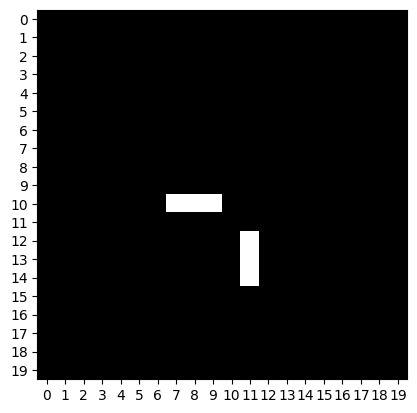

In [20]:
import time
from numpy import random as r
from IPython.display import clear_output

coordset['dog'] = [[10, 8], [11, 8], [12, 8],  # Head
                       [9, 9], [10, 9], [11, 9], [12, 9], [13, 9],  # Body
                       [9, 10], [13, 10],  # Legs
                       [10, 11], [12, 11], # Legs
                       [11,12], # Tail
                       [12, 9], [13, 9], [14,9]]  # Tongue

# choose initial state
grid = set_intial_state(coordset['dog'], grid)

# display initial state
display_binary_matrix(grid, 0)

# run simulation
num_gens = 100
for gen in range(1, num_gens+1):
    clear_output(wait=True)
    #time.sleep(0.1)
    grid = update_grid(grid)
    display_binary_matrix(grid, gen)

print("Simulation finished")